In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
bat_df = pd.read_csv("../Data/Corpus_csv/batters_all_career.csv")

In [4]:
bat_df.head()

,Id,Name,Active,First year,Last year,Url,Country,Bat hand,Throw hand,Full Name,HoF,HoF type,HoF year,HoF comittee,Player type,retirement_age,total_seasons,career_teams,career_leagues,first_position,second_position,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SB_bt,SF_bt,SH_bt,SLG_bt,SO_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,CS%_fd,CS_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,RF/9_fd,RF/G_fd,SB_fd,WP_fd
0,Aaron_Altherr_320,Aaron Altherr,False,2014,2019,https://www.baseball-reference.com//players/a/...,de,Right,Right,Aaron Samuel Altherr,0,-,-,-,2,28,6,['PHI'],['NL'],OF,-,1,0,0,2010,2010,54.0,10.0,1016.0,0.219,110.0,10.0,359.0,37.0,222.0,4.0,0.307,88.0,0.708,1156.0,-17.0,21.0,150.0,142.0,1.0,-14.0,-1.0,7.0,-10.0,38.0,21.0,6.0,1.0,0.401,332.0,407.0,-2.1,1.6,-0.5,13.0,0.9,30.0,366.0,NaN,0.0,1110.0,12.0,12.0,0.989,494.0,669.0,4609.0,NaN,1068.0,2.14,1.64,0.0,NaN
1,Abe_Atkins_626,Abe Atkins,False,1923,1923,https://www.baseball-reference.com//players/a/...,us,desconocido,desconocido,Abe Atkins,0,-,-,-,2,29,1,['TT'],['NNL'],3B,-,0,1,0,1920,1920,0.0,0.0,1.0,0.000,0.0,NaN,1.0,0.0,0.0,NaN,0.000,-100.0,0.000,2.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.000,NaN,0.0,-0.1,-0.1,0.0,-1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000,1.0,1.0,5.0,NaN,0.0,0.00,0.00,NaN,NaN
2,Abiatal_Avelino_670,Abiatal Avelino,False,2018,2019,https://www.baseball-reference.com//players/a/...,do,Right,Right,Abiatal Avelino,0,-,-,-,2,24,2,['SFG'],['NL'],SS,2B,1,0,0,2010,2010,0.0,0.0,18.0,0.278,1.0,0.0,10.0,0.0,5.0,0.0,0.316,65.0,0.594,19.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.278,6.0,5.0,-0.1,0.0,0.0,0.0,0.0,11.0,2.0,NaN,NaN,22.0,2.0,1.0,0.955,6.0,7.0,43.2,NaN,10.0,4.38,3.00,NaN,NaN
3,Abraham_Almonte_292,Abraham Almonte,True,2013,2021,https://www.baseball-reference.com//players/a/...,do,Both,Right,Abraham Almonte,0,-,-,-,2,32,9,"['SEA', 'CLE', 'KCR', 'ARI', 'SDP', 'ATL']","['AL', 'NL']",OF,-,1,0,0,2010,2020,70.0,13.0,1186.0,0.234,117.0,9.0,440.0,23.0,278.0,1.0,0.302,82.0,0.676,1326.0,-32.0,14.0,116.0,161.0,1.0,-32.0,2.0,2.0,-6.0,47.0,26.0,11.0,9.0,0.374,307.0,443.0,-3.2,1.3,-0.2,12.0,1.0,42.0,476.0,NaN,NaN,1272.0,10.0,34.0,0.973,594.0,738.0,5299.1,NaN,1196.0,2.10,1.68,NaN,NaN
4,Adams_69,Adams,False,1942,1942,https://www.baseball-reference.com//players/a/...,desconocido,desconocido,desconocido,desconocido,0,-,-,-,2,desconocido,1,['MRS'],['NAL'],C,-,0,1,0,1940,1940,0.0,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


In [5]:
bat_df.shape

(12525, 78)

In [6]:
from Preprocessing.data_keys import headers_bio, headers_bat

In [7]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [8]:
bat_df['retirement_age'] = (
        bat_df['retirement_age'].replace('desconocido', bat_df['retirement_age'].mode()[0])
    )
bat_df['retirement_age'] = bat_df['retirement_age'].astype('int64')

In [9]:
gt_conditions = {
    "total_seasons":3,
    'G_bt':100,
    'BA_bt':0.2,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(bat_df, eq_conditions,gt_conditions, None, None)

In [10]:
filter_df.shape

(5761, 78)

In [11]:
for h in headers_bat:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

CS_bt:True --->891
IBB_bt:True --->1306
SB_bt:True --->29
SF_bt:True --->2099
SH_bt:True --->292
SO_bt:True --->347
CS%_fd:True --->4748
CS_fd:True --->4073
PB_fd:True --->4474
SB_fd:True --->4073
WP_fd:True --->4474


In [12]:
print(filter_df['HoF'].value_counts())

0    5576
1     185
Name: HoF, dtype: int64


In [13]:
inactives_cond = {"Active":[False]}
inactive_bat_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [14]:
inactive_bat_df.shape

(5330, 78)

In [15]:
print(inactive_bat_df['HoF'].value_counts())

0    5145
1     185
Name: HoF, dtype: int64


In [16]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_bat_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [17]:
negro_lg_bat_df.shape

(378, 78)

In [18]:
negro_lg_bat_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SB_bt,SF_bt,SH_bt,SLG_bt,SO_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,CS%_fd,CS_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,RF/9_fd,RF/G_fd,SB_fd,WP_fd
count,378.000000,378.000000,378.000000,378.0,378.000000,378.000000,378.000000,378.0,378.0,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,67.000000,378.00000,378.000000,378.000000,161.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,130.000000,378.000000,378.00000,39.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.00000,77.000000,206.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,126.000000,378.000000,378.000000,378.000000,206.000000,126.000000
mean,1929.007937,1939.296296,0.063492,2.0,34.150794,8.775132,0.203704,1.0,0.0,1925.634921,1933.968254,54.738095,18.142857,1244.298942,0.277611,122.494709,10.716418,354.42328,20.904762,356.185185,5.204969,0.340960,98.285714,0.724937,1409.235450,16.097884,63.026455,184.267196,207.277778,0.526455,12.611111,0.050265,2.452381,0.502646,46.857143,31.820106,3.284615,33.071429,0.38396,222.846154,509.923280,1.490212,5.939683,0.216138,60.584656,5.577513,275.288360,64.07672,0.015584,2.383495,1258.351852,51.227513,49.484127,0.951042,197.936508,376.232804,2860.384127,6.166667,933.579365,4.422725,3.202222,34.893204,3.880952
std,8.260188,9.750578,0.244169,0.0,5.605133,4.243230,0.403285,0.0,0.0,7.373625,9.832499,58.056340,17.852199,1129.903124,0.034308,148.189950,25.866678,312.28026,48.338236,342.392956,21.765546,0.038709,29.351756,0.111725,1302.874378,91.620127,126.608293,201.169591,215.635400,5.229542,82.832832,2.149607,15.536015,14.649440,44.298430,39.909505,11.855221,27.968961,0.07698,331.142880,558.423944,8.806312,12.322183,2.202441,116.775190,11.303683,404.537774,384.82428,0.082820,23.389460,1517.964476,84.533867,43.205708,0.023803,430.582132,463.481822,4046.833899,10.573741,1337.321715,2.433762,1.687438,58.462982,29.345012
min,1920.000000,1922.000000,0.000000,2.0,20.000000,3.000000,0.000000,1.0,0.0,1920.000000,1920.000000,5.000000,0.000000,296.000000,0.200000,8.000000,0.000000,100.00000,0.000000,66.000000,0.000000,0.251000,34.000000,0.491000,316.000000,-125.000000,-60.000000,19.000000,28.000000,-8.000000,-141.000000,-18.000000,-44.000000,-76.000000,7.000000,0.000000,0.000000,3.000000,0.23200,0.000000,76.000000,-11.000000,-5.100000,-9.800000,-61.000000,-5.500000,2.000000,0.00000,0.000000,0.000000,54.000000,0.000000,2.000000,0.861000,0.000000,91.000000,82.000000,0.000000,23.000000,1.130000,0.410000,0.000000,0.000000
25%,1922.000000,1930.250000,0.000000,2.0,30.000000,5.000000,0.000000,1.0,0.0,1920.000000,1930.000000,21.000000,7.000000,550.250000,0.255250,46.250000,0.000000,164.00000,3.000000,147.250000,0.000000,0.315000,77.250000,0.647000,609.750000,-21.000000,5.000000,71.000000,80.000000,-1.000000,-23.000000,0.000000,-4.000000,-7.000000,20.000000,9.250000,0.000000,13.000000,0.32900,14.000000,201.250000,-1.900000,0.525000,-0.775000,5.250000,0.500000,58.750000,0.00000,0.000000,0.000000,485.000000,10.000000,20.000000,0.936000,59.000000,161.250000,988.600000,0.000000,300.500000,2.360000,2.120000,0.000000,0.000000
50%,1926.000000,1940.000000,0.000000,2.0,34.000000,8.000000,0.000000,1.0,0.0,1920.000000,1940.000000,33.500000,12.000000,879.000000,0.275000,74.000000,0.000000,251.00000,7.500000,240.500000,0.000000,0.340000,96.000000,0.712500,991.000000,-3.000000,24.500000,110.500000,131.000000,0.000000,-5.000000,0.000000,0.000000,1.000000,33.000000,18.000000,0.000000,23.500000,0.37300,62.000000,314

In [19]:
negro_lg_bat_df['HoF'].value_counts()

0    354
1     24
Name: HoF, dtype: int64

In [20]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_bt':10
}
mayors_lg_bat_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)

In [21]:
mayors_lg_bat_df.shape

(1670, 78)

In [22]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_bat_df = filter_dataset(inactive_bat_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [23]:
inactive_mayors_lg_bat_df.shape

(1290, 78)

In [24]:
inactive_mayors_lg_bat_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SB_bt,SF_bt,SH_bt,SLG_bt,SO_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,CS%_fd,CS_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,RF/9_fd,RF/G_fd,SB_fd,WP_fd
count,1290.000000,1290.000000,1290.000000,1290.0,1290.000000,1290.000000,1290.0,1290.000000,1290.00000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1133.000000,1290.000000,1290.000000,1290.000000,982.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.00000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,749.000000,1234.000000,1290.000000,1283.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,157.000000,284.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,222.000000,1290.000000,1290.000000,1290.000000,284.000000,222.000000
mean,1945.393798,1958.806977,0.125581,2.0,35.452713,13.723256,1.0,0.015504,0.00155,1941.031008,1954.093023,248.341085,56.176744,5209.704651,0.277590,545.475194,49.409532,1483.337984,120.444186,1458.346512,50.461303,0.348319,110.044186,0.761171,5888.166667,98.755039,295.71938,694.564341,764.884496,2.797674,88.066667,-0.157364,14.583721,-6.566667,196.924031,128.536434,44.511348,68.846840,0.412882,612.428683,2180.373643,9.560465,29.314806,0.760155,281.088372,28.081783,1571.172868,1482.541085,0.385987,211.552817,7109.300000,378.991473,197.793023,0.967915,1699.567442,1939.224031,14329.403566,76.743243,5340.334109,4.716450,4.003698,319.433099,124.527027
std,35.283710,35.458549,0.331506,0.0,3.501924,3.724013,0.0,0.123593,0.03936,35.391293,35.442332,115.239414,40.204343,1980.567779,0.023239,300.894693,38.169049,514.340554,114.498307,609.588965,48.180302,0.028991,18.596330,0.076257,2251.045122,154.673295,206.77849,354.156879,356.840332,16.794200,164.763592,9.250629,49.188271,59.965265,77.648002,139.707771,25.429812,67.258095,0.056103,372.789669,982.541274,15.515681,20.828509,9.066656,198.176599,19.952851,1760.865109,928.544936,0.102818,275.831427,3828.576078,421.047286,154.303258,0.025165,1036.622510,957.617552,7221.860849,91.628118,3810.030594,2.235908,2.218515,398.391074,149.775418
min,1871.000000,1877.000000,0.000000,2.0,26.000000,4.000000,1.0,0.000000,0.00000,1870.000000,1870.000000,36.000000,2.000000,1292.000000,0.217000,10.000000,0.000000,307.000000,0.000000,423.000000,0.000000,0.265000,65.000000,0.542000,1430.000000,-179.000000,93.00000,92.000000,169.000000,-33.000000,-317.000000,-47.000000,-195.000000,-190.000000,46.000000,0.000000,0.000000,0.000000,0.264000,7.000000,583.000000,-18.500000,10.000000,-27.700000,22.000000,2.900000,30.000000,0.000000,0.000000,0.000000,651.000000,3.000000,25.000000,0.796000,0.000000,321.000000,2726.000000,0.000000,437.000000,1.600000,0.760000,0.000000,0.000000
25%,1915.000000,1929.000000,0.000000,2.0,33.000000,11.000000,1.0,0.000000,0.00000,1910.000000,1920.000000,164.000000,28.000000,3774.000000,0.262000,342.250000,22.000000,1112.000000,40.000000,1004.750000,21.000000,0.329000,98.000000,0.711000,4238.500000,7.000000,152.00000,428.250000,501.000000,-7.000000,-8.750000,-4.000000,-14.000000,-50.000000,140.000000,36.000000,27.000000,21.000000,0.374000,345.000000,1467.000000,0.400000,15.000000,-5.200000,149.000000,14.700000,264.000000,905.250000,0.300000,0.000000,4542.750000,63.250000,101.000000,0.961000,1055.250000,1254.500000,9354.900000,13.250000,2712.250000,2.872500,2.220000,0.000000,0.000000
50%,1951.000000,1966.000000,0.000000,2.0,35.000000,13.000000,1.0,0.000000,0.00000,1950.000000,1960.000000,226.000000,47.000000,4913.000000,0.275000,471.000000,39.000000,1415.500000,85.000000,1339.

In [25]:
features = ['retirement_age','debut_decade','retirament_decade','total_seasons','play_in_mayors','play_in_negro_league','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt','A_fd','CG_fd','Ch_fd','DP_fd','E_fd','Fld%_fd','GS_fd','G_fd','Inn_fd','PO_fd','RF/9_fd',
'RF/G_fd','HoF']

print(len(features))

49


In [26]:
X = select_features(inactive_mayors_lg_bat_df, features)
X

,retirement_age,debut_decade,retirament_decade,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,G_bt,HR_bt,H_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SLG_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PO_fd,RF/9_fd,RF/G_fd,HoF
5,37,1970,1980,17,1,0,0,183.0,13.0,4123.0,0.245,461.0,1370.0,90.0,1010.0,0.320,93.0,0.681,4699.0,-45.0,117.0,513.0,397.0,-13.0,-48.0,-6.0,-57.0,78.0,162.0,0.361,1489.0,-5.0,11.1,2.4,173.0,17.0,685.0,1008.0,7895.0,75.0,114.0,0.986,1192.0,1306.0,10530.2,7096.0,6.65,5.96,0
19,42,1950,1970,23,1,0,0,624.0,98.0,12364.0,0.305,1402.0,3298.0,755.0,3771.0,0.374,155.0,0.928,13941.0,866.0,1363.0,2297.0,2174.0,44.0,877.0,-12.0,98.0,-141.0,496.0,0.555,6856.0,92.8,143.0,-4.6,1265.0,132.6,630.0,5114.0,13778.0,260.0,260.0,0.981,5908.0,6018.0,50162.2,12888.0,2.43,2.25,1
34,36,1980,2000,13,1,0,0,189.0,53.0,3971.0,0.260,500.0,1341.0,47.0,1031.0,0.346,89.0,0.715,4614.0,-32.0,129.0,422.0,551.0,7.0,-65.0,2.0,1.0,21.0,161.0,0.369,1467.0,-3.5,11.9,2.4,128.0,11.9,2849.0,867.0,5023.0,632.0,142.0,0.972,1020.0,1213.0,8833.2,2032.0,4.97,4.02,0
36,39,1950,1970,18,1,0,0,394.0,92.0,10230.0,0.262,736.0,2599.0,83.0,2677.0,0.311,82.0,0.653,11231.0,215.0,565.0,791.0,1335.0,92.0,-198.0,18.0,149.0,154.0,350.0,0.343,3504.0,20.5,55.9,31.9,416.0,42.2,8016.0,2377.0,12930.0,1553.0,366.0,0.972,2538.0,2581.0,22408.2,4548.0,5.05,4.87,1
38,30,1920,1930,5,1,0,0,164.0,30.0,2450.0,0.331,248.0,662.0,61.0,811.0,0.394,129.0,0.891,2737.0,41.0,142.0,459.0,369.0,-9.0,104.0,-12.0,-14.0,-29.0,102.0,0.497,1218.0,3.4,13.6,-4.0,156.0,14.8,328.0,576.0,6175.0,502.0,71.0,0.989,618.0,625.0,5398.0,5776.0,10.18,9.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12467,34,1870,1880,15,1,0,0,218.0,89.0,4005.0,0.273,198.0,963.0,14.0,1095.0,0.309,119.0,0.692,4213.0,70.0,207.0,502.0,743.0,1.0,81.0,0.0,50.0,-62.0,137.0,0.383,1533.0,5.4,19.6,-2.0,157.0,16.6,130.0,0.0,2373.0,23.0,291.0,0.877,129.0,963.0,8657.0,1952.0,2.16,2.16,0
12507,32,1900,1910,13,1,0,0,275.0,105.0,5304.0,0.295,242.0,1456.0,58.0,1566.0,0.331,121.0,0.750,5744.0,146.0,323.0,799.0,695.0,-8.0,124.0,0.0,-5.0,34.0,177.0,0.419,2225.0,15.1,33.6,3.2,328.0,34.8,2946.0,1271.0,5733.0,280.0,381.0,0.934,1365.0,1414.0,12029.0,2406.0,4.00,3.79,0
12512,34,1970,1980,13,1,0,0,245.0,26.0,5144.0,0.287,533.0,1453.0,207.0,1477.0,0.353,127.0,0.818,5737.0,56.0,252.0,792.0,681.0,-14.0,172.0,-13.0,-9.0,-80.0,195.0,0.466,2395.0,6.4,25.0,-9.2,260.0,25.9,137.0,1500.0,3568.0,41.0,66.0,0.982,2216.0,2297.0,15372.2,3365.0,2.05,1.52,0
12517,38,1980,2000,16,1,0,0,397.0,23.0,7573.0,0.265,945.0,2158.0,253.0,2004.0,0.346,104.0,0.769,8649.0,-61.0,217.0,1110.0,986.0,-30.0,49.0,-17.0,-70.0,7.0,277.0,0.423,3206.0,-7.5,19.4,-6.8,286.0,26.7,3089.0,1823.0,8623.0,552.0,277.0,0.968,2018.0,2111.0,17703.1,5257.0,4.24,3.95,0


In [27]:
X.describe()

,retirement_age,debut_decade,retirament_decade,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,G_bt,HR_bt,H_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SLG_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PO_fd,RF/9_fd,RF/G_fd,HoF
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.0,1290.000000,1290.00000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.00000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,35.452713,1941.031008,1954.093023,13.723256,1.0,0.015504,0.00155,248.341085,56.176744,5209.704651,0.277590,545.475194,1483.337984,120.444186,1458.346512,0.348319,110.044186,0.761171,5888.166667,98.755039,295.71938,694.564341,764.884496,2.797674,88.066667,-0.157364,14.583721,-6.566667,196.924031,0.412882,2180.373643,9.560465,29.314806,0.760155,281.088372,28.081783,1571.172868,1482.541085,7109.300000,378.991473,197.793023,0.967915,1699.567442,1939.224031,14329.403566,5340.334109,4.716450,4.003698,0.125581
std,3.501924,35.391293,35.442332,3.724013,0.0,0.123593,0.03936,115.239414,40.204343,1980.567779,0.023239,300.894693,514.340554,114.498307,609.588965,0.028991,18.596330,0.076257,2251.045122,154.673295,206.77849,354.156879,356.840332,16.794200,164.763592,9.250629,49.188271,59.965265,77.648002,0.056103,982.541274,15.515681,20.828509,9.066656,198.176599,19.952851,1760.865109,928.544936,3828.576078,421.047286,154.303258,0.025165,1036.622510,957.617552,7221.860849,3810.030594,2.235908,2.218515,0.331506
min,26.000000,1870.000000,1870.000000,4.000000,1.0,0.000000,0.00000,36.000000,2.000000,1292.000000,0.217000,10.000000,307.000000,0.000000,423.000000,0.265000,65.000000,0.542000,1430.000000,-179.000000,93.00000,92.000000,169.000000,-33.000000,-317.000000,-47.000000,-195.000000,-190.000000,46.000000,0.264000,583.000000,-18.500000,10.000000,-27.700000,22.000000,2.900000,30.000000,0.000000,651.000000,3.000000,25.000000,0.796000,0.000000,321.000000,2726.000000,437.000000,1.600000,0.760000,0.000000
25%,33.000000,1910.000000,1920.000000,11.000000,1.0,0.000000,0.00000,164.000000,28.000000,3774.000000,0.262000,342.250000,1112.000000,40.000000,1004.750000,0.329000,98.000000,0.711000,4238.500000,7.000000,152.00000,428.250000,501.000000,-7.000000,-8.750000,-4.000000,-14.000000,-50.000000,140.000000,0.374000,1467.000000,0.400000,15.000000,-5.200000,149.000000,14.700000,264.000000,905.250000,4542.750000,63.250000,101.000000,0.961000,1055.250000,1254.500000,9354.900000,2712.250000,2.872500,2.220000,0.000000
50%,35.000000,1950.000000,1960.000000,13.000000,1.0,0.000000,0.00000,226.000000,47.000000,4913.000000,0.275000,471.000000,1415.500000,85.000000,1339.500000,0.347000,109.000000,0.757000,5528.500000,54.000000,224.50000,598.500000,694.000000,-1.000000,60.000000,0.000000,11.000000,-11.500000,184.500000,0.410000,1940.000000,5.200000,22.400000,-0.700000,222.500000,22.350000,727.000000,1370.000000,6173.500000,175.000000,152.500000,0.975000,1551.500000,1725.000000,12696.100000,4338.000000,4.495000,3.340000,0.000000
75%,37.000000,1970.000000,1987.500000,16.000000,1.0,0.000000,0.00000,307.750000,73.000000,6442.500000,0.291000,677.500000,1800.750000,163.000000,1803.750000,0.366000,121.000000,0.806000,7236.750000,145.750000,369.00000,876.750000,950.000000,8.000000,149.000000,4.000000,38.000000,40.000000,245.000000,0.447750,2738.750000,14.175000,37.400000,5.900000,353.750000,35.350000,2521.250000,1956.500000,8658.750000,620.750000,238.000000,0.984000,2227.000000,2390.750000,17562.000000,6779.7

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [29]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

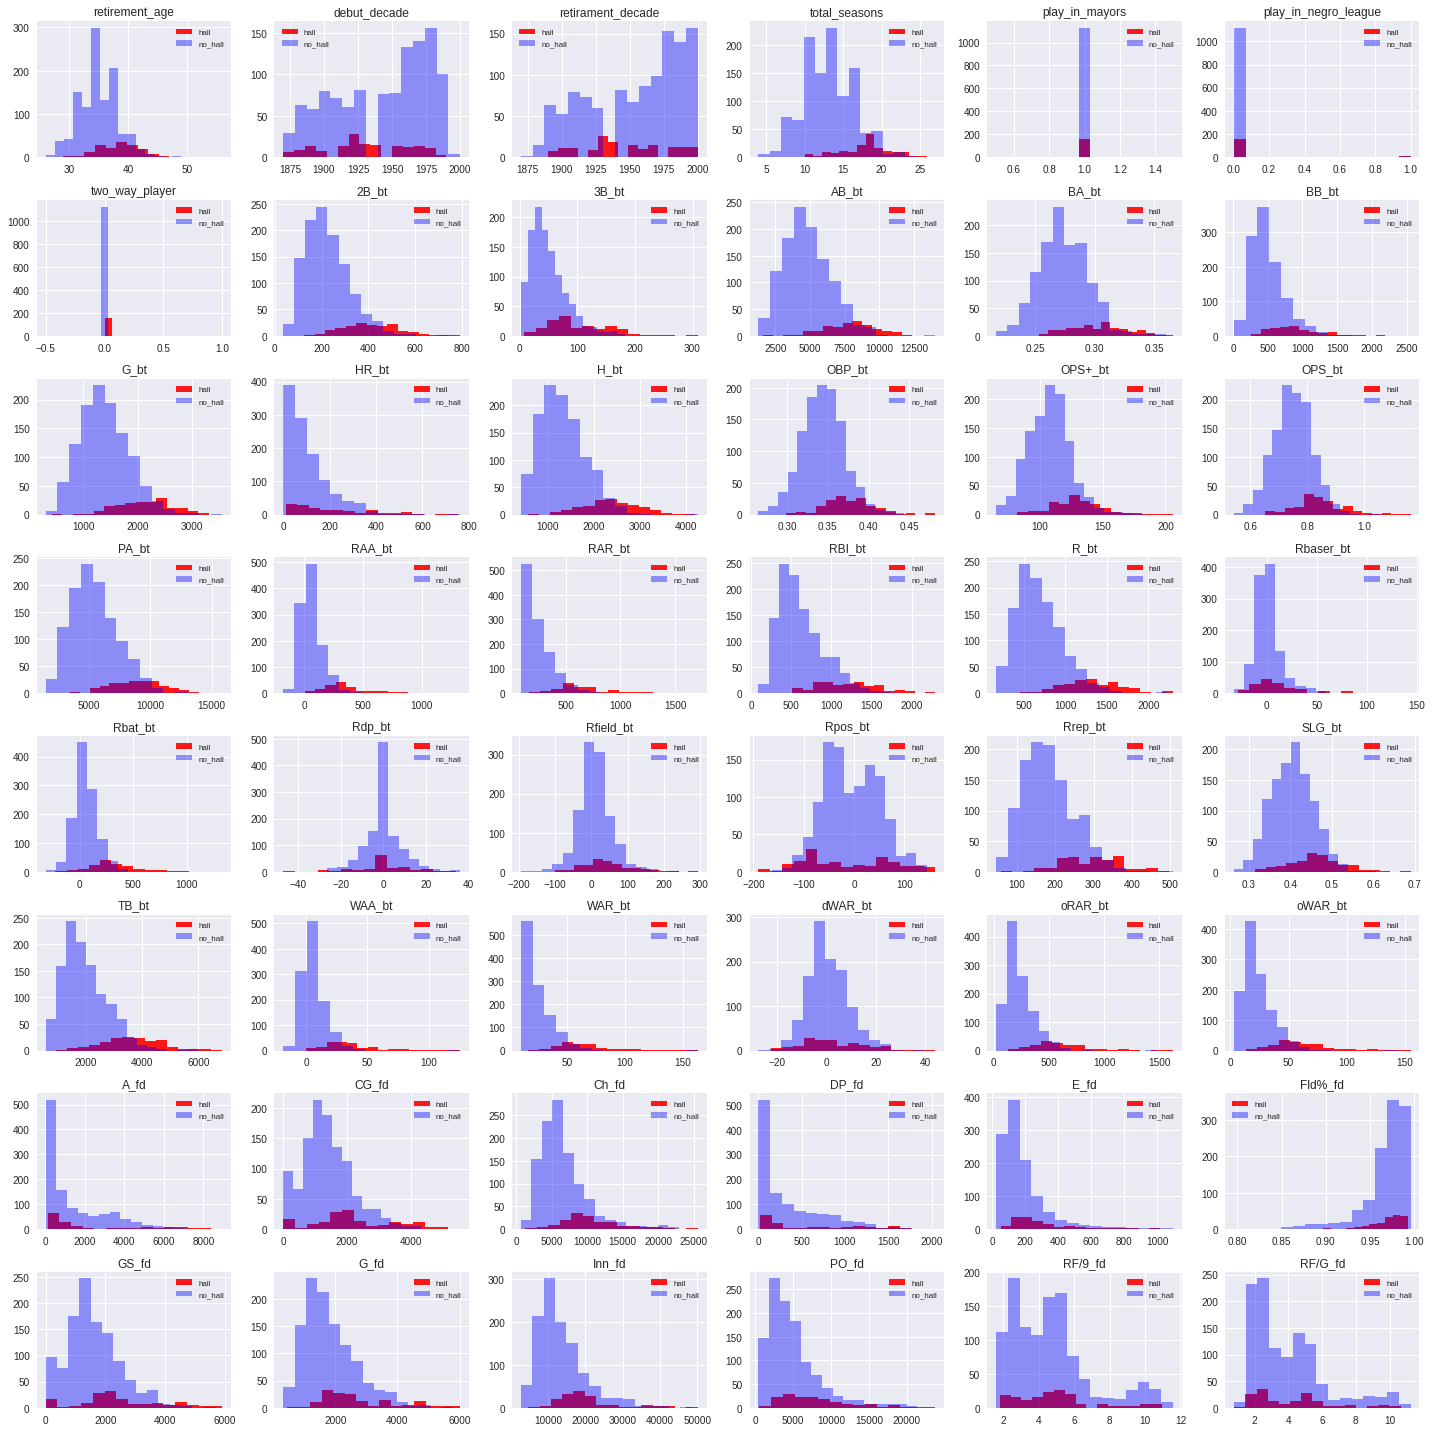

In [30]:
_, axes = plt.subplots(8,6, figsize=(20, 20))


ax = axes.ravel()
i = 0
for feat_n in features[:-1]:                  # for each of the 48 features
    bins = 15
    #---plot histogram for each feature---
    ax[i].hist(hall[feat_n], bins=bins, color='r', alpha=.9)
    ax[i].hist(no_hall[feat_n], bins=bins, color='b', alpha=0.4)
    #---set the title---
    ax[i].set_title(feat_n, fontsize=12)    
    #---display the legend---
    ax[i].legend(['hall','no_hall'], loc='best', fontsize=8)
    i +=1
    
plt.tight_layout()
plt.show()

Las estadisticas defensivas no muestran practicamente diferencia en ambos grupos

In [31]:
of_features = ['retirement_age','debut_decade','retirament_decade','total_seasons','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt']

In [32]:
X = select_features(inactive_mayors_lg_bat_df, of_features)
y = select_features(inactive_mayors_lg_bat_df, ['HoF'])

In [33]:
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [34]:
print(X.index)
y.index

RangeIndex(start=0, stop=1290, step=1)


RangeIndex(start=0, stop=1290, step=1)

In [35]:
X.describe()

,retirement_age,debut_decade,retirament_decade,total_seasons,two_way_player,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,G_bt,HR_bt,H_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SLG_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.00000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.00000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,35.452713,1941.031008,1954.093023,13.723256,0.00155,248.341085,56.176744,5209.704651,0.277590,545.475194,1483.337984,120.444186,1458.346512,0.348319,110.044186,0.761171,5888.166667,98.755039,295.71938,694.564341,764.884496,2.797674,88.066667,-0.157364,14.583721,-6.566667,196.924031,0.412882,2180.373643,9.560465,29.314806,0.760155,281.088372,28.081783
std,3.501924,35.391293,35.442332,3.724013,0.03936,115.239414,40.204343,1980.567779,0.023239,300.894693,514.340554,114.498307,609.588965,0.028991,18.596330,0.076257,2251.045122,154.673295,206.77849,354.156879,356.840332,16.794200,164.763592,9.250629,49.188271,59.965265,77.648002,0.056103,982.541274,15.515681,20.828509,9.066656,198.176599,19.952851
min,26.000000,1870.000000,1870.000000,4.000000,0.00000,36.000000,2.000000,1292.000000,0.217000,10.000000,307.000000,0.000000,423.000000,0.265000,65.000000,0.542000,1430.000000,-179.000000,93.00000,92.000000,169.000000,-33.000000,-317.000000,-47.000000,-195.000000,-190.000000,46.000000,0.264000,583.000000,-18.500000,10.000000,-27.700000,22.000000,2.900000
25%,33.000000,1910.000000,1920.000000,11.000000,0.00000,164.000000,28.000000,3774.000000,0.262000,342.250000,1112.000000,40.000000,1004.750000,0.329000,98.000000,0.711000,4238.500000,7.000000,152.00000,428.250000,501.000000,-7.000000,-8.750000,-4.000000,-14.000000,-50.000000,140.000000,0.374000,1467.000000,0.400000,15.000000,-5.200000,149.000000,14.700000
50%,35.000000,1950.000000,1960.000000,13.000000,0.00000,226.000000,47.000000,4913.000000,0.275000,471.000000,1415.500000,85.000000,1339.500000,0.347000,109.000000,0.757000,5528.500000,54.000000,224.50000,598.500000,694.000000,-1.000000,60.000000,0.000000,11.000000,-11.500000,184.500000,0.410000,1940.000000,5.200000,22.400000,-0.700000,222.500000,22.350000
75%,37.000000,1970.000000,1987.500000,16.000000,0.00000,307.750000,73.000000,6442.500000,0.291000,677.500000,1800.750000,163.000000,1803.750000,0.366000,121.000000,0.806000,7236.750000,145.750000,369.00000,876.750000,950.000000,8.000000,149.000000,4.000000,38.000000,40.000000,245.000000,0.447750,2738.750000,14.175000,37.400000,5.900000,353.750000,35.350000
max,56.000000,2000.000000,2000.000000,27.000000,1.00000,792.000000,309.000000,14053.000000,0.366000,2558.000000,3562.000000,762.000000,4256.000000,0.482000,206.000000,1.164000,15890.000000,1326.000000,1703.00000,2297.000000,2295.000000,144.000000,1333.000000,36.000000,294.000000,162.000000,507.000000,0.690000,6856.000000,125.300000,162.800000,44.200000,1624.000000,155.000000


In [36]:
print(X.shape)
y.shape

(1290, 34)


(1290, 1)

In [37]:
y.value_counts()

HoF
0      1128
1       162
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [38]:
round((162/1290),3)*100

12.6

Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el entrenamiento

In [40]:
from Models.functions.learning_curve import learning_curves_describe
from Models.functions.metrics import train_with_cv, show_baseline_score

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [41]:
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8744
AUC: 0.5000


El resultado AUC promediado es 0.8997
El resultado ACC promediado es 0.9464
El resultado CK promediado es 0.7226


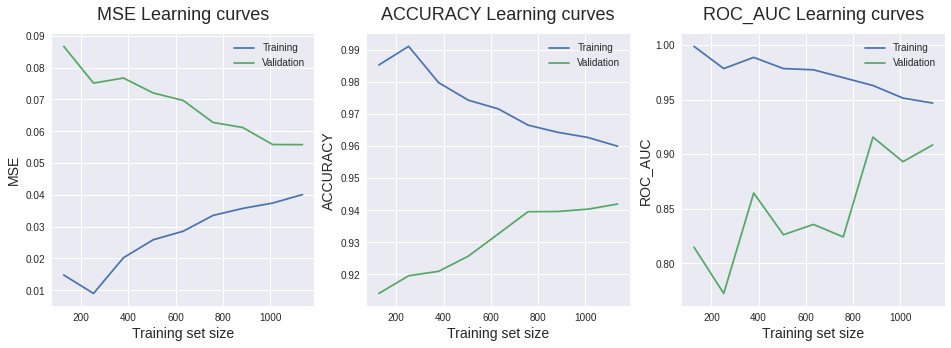

In [42]:
dtg4_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
dtg4_metric = train_with_cv(dtg4_clf, X, y, n_splits=50)
learning_curves_describe(dtg4_clf,X,y)

El resultado AUC promediado es 0.8165
El resultado ACC promediado es 0.9200
El resultado CK promediado es 0.6168


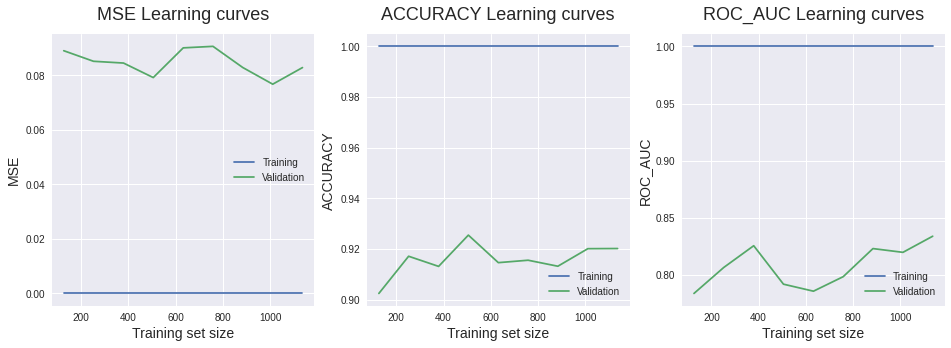

In [43]:
dtgx_clf = DecisionTreeClassifier(criterion='gini')
dtgx_metric = train_with_cv(dtgx_clf, X, y)
learning_curves_describe(dtgx_clf,X,y)

Vamos a ver que nos dicen los clasificadores acerca de los features sin agregar ningun procesamiento previo

El resultado AUC promediado es 0.9454
El resultado ACC promediado es 0.9411
El resultado CK promediado es 0.6925


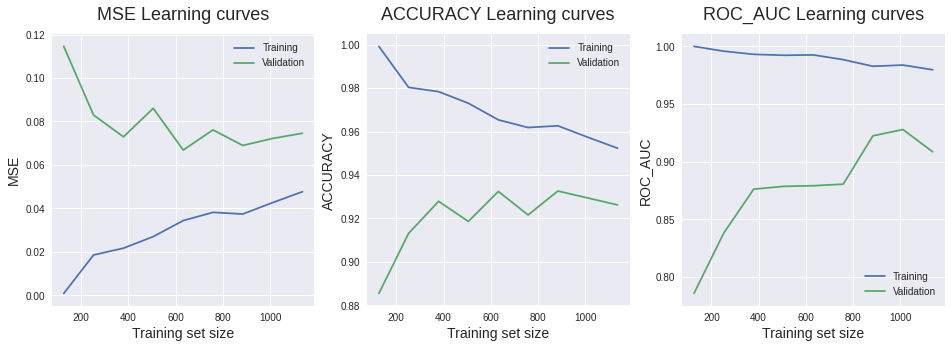

In [44]:
dte4_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dte4_metric = train_with_cv(dte4_clf, X, y)
learning_curves_describe(dte4_clf,X,y)

El resultado AUC promediado es 0.9454
El resultado ACC promediado es 0.9411
El resultado CK promediado es 0.6925


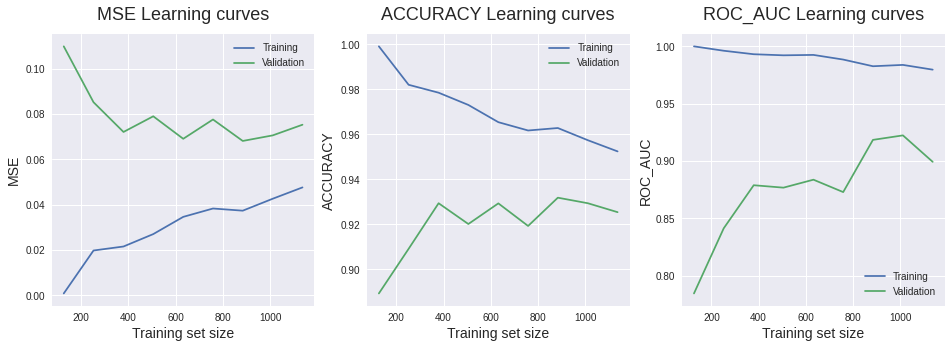

In [45]:
dte3_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dte3_metric = train_with_cv(dte3_clf, X, y)
learning_curves_describe(dte3_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9516
El resultado ACC promediado es 0.9217
El resultado CK promediado es 0.5061


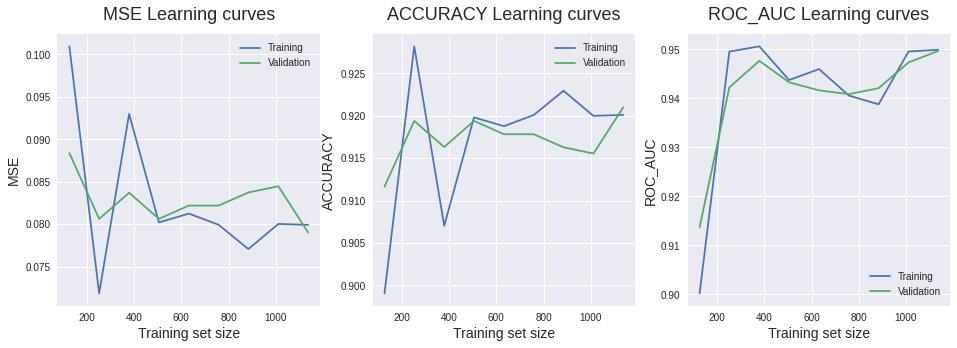

In [46]:
svmp_clf = SVC(probability=True, kernel='poly')
svmp_metric = train_with_cv(svmp_clf, X, y)
learning_curves_describe(svmp_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9173
El resultado ACC promediado es 0.9132
El resultado CK promediado es 0.4697


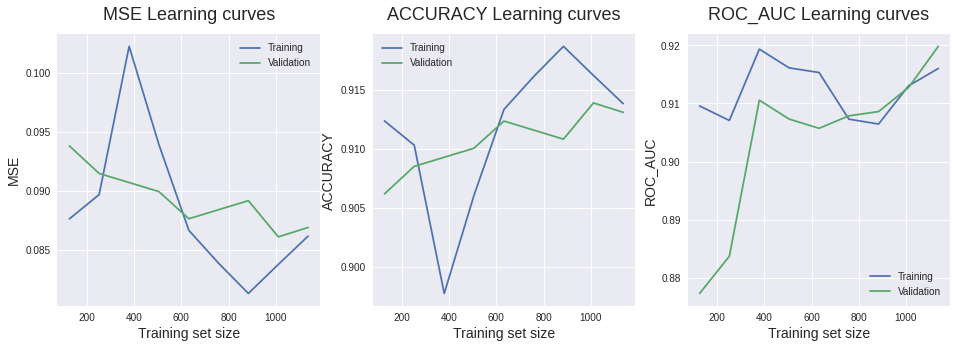

In [47]:
svmr_clf = SVC(probability=True, kernel='rbf')
svmr_metric = train_with_cv(svmr_clf, X, y)
learning_curves_describe(svmr_clf,X,y)

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame

El resultado AUC promediado es 0.9600
El resultado ACC promediado es 0.9424
El resultado CK promediado es 0.6953


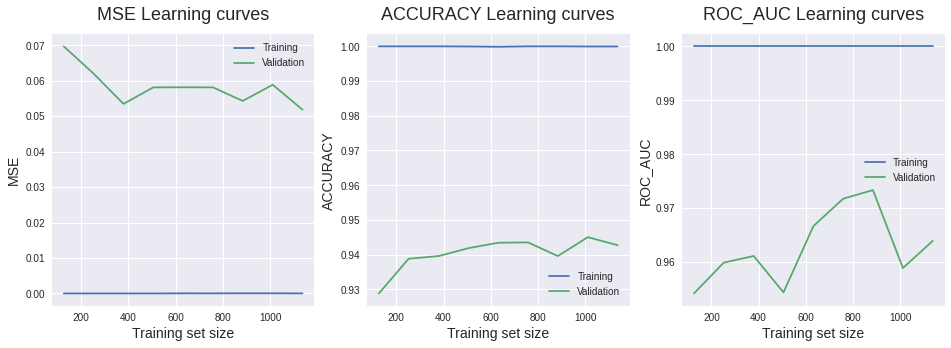

In [48]:
rfg100_clf = RandomForestClassifier()
rfg100_metric = train_with_cv(rfg100_clf, X, y)
learning_curves_describe(rfg100_clf,X,y)

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame

El resultado AUC promediado es 0.9624
El resultado ACC promediado es 0.9440
El resultado CK promediado es 0.7087


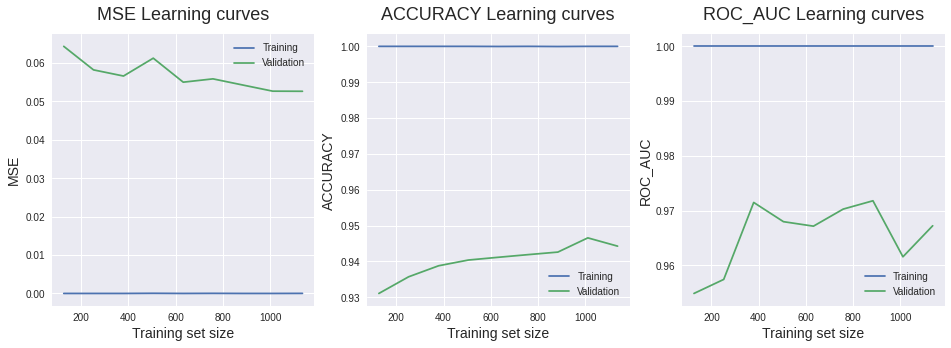

In [49]:
rfe100_clf = RandomForestClassifier(criterion='entropy')
rfe100_metric = train_with_cv(rfe100_clf, X, y)
learning_curves_describe(rfe100_clf,X,y)

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame

El resultado AUC promediado es 0.9487
El resultado ACC promediado es 0.9380
El resultado CK promediado es 0.6577


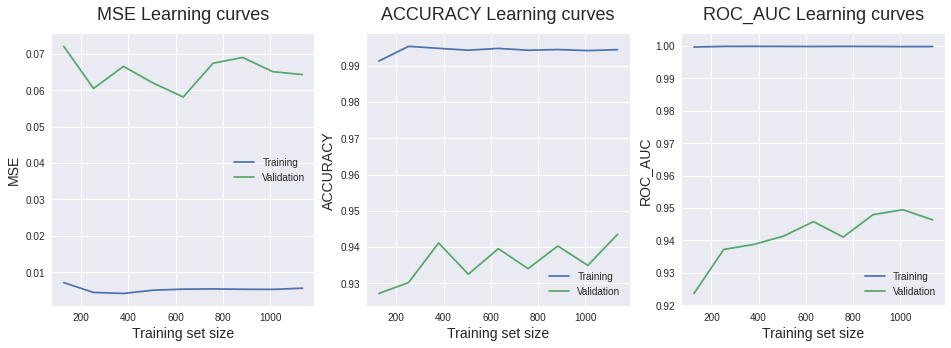

In [50]:
rfg10_clf = RandomForestClassifier(n_estimators=10)
rfg10_metric = train_with_cv(rfg10_clf, X, y)
learning_curves_describe(rfg10_clf,X,y)

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame

El resultado AUC promediado es 0.9120
El resultado ACC promediado es 0.9371
El resultado CK promediado es 0.6875


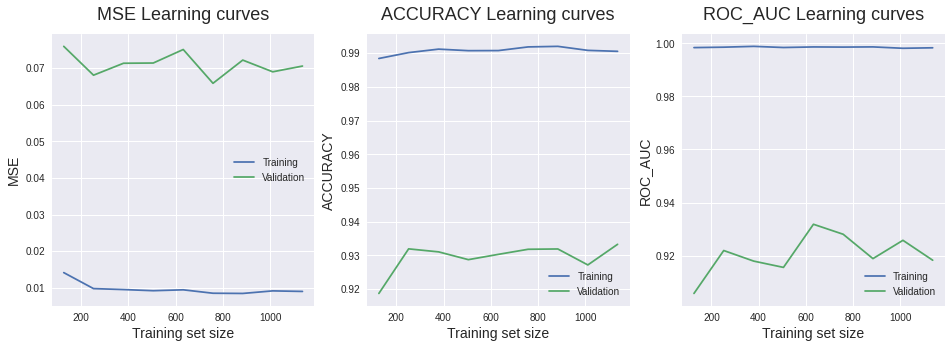

In [51]:
rfg5_clf = RandomForestClassifier(n_estimators=5)
rfg5_metric = train_with_cv(rfg5_clf, X, y)
learning_curves_describe(rfg5_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9424
El resultado ACC promediado es 0.8985
El resultado CK promediado es 0.6336


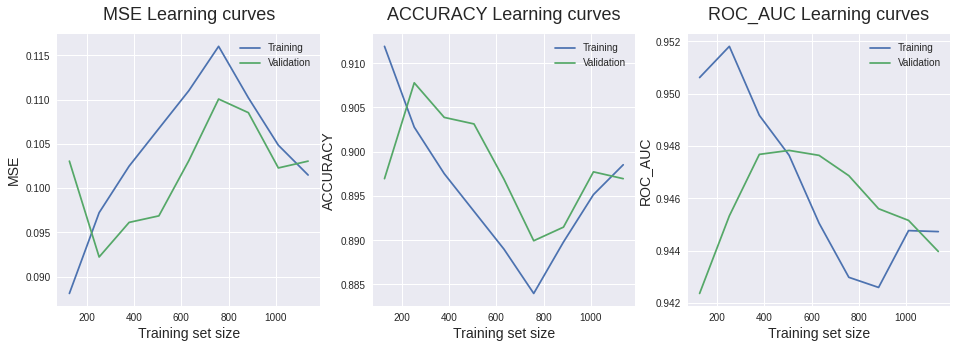

In [52]:
nb_clf = GaussianNB()
nb_metric = train_with_cv(nb_clf, X, y)
learning_curves_describe(nb_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

El resultado AUC promediado es 0.8868
El resultado ACC promediado es 0.9279
El resultado CK promediado es 0.5865


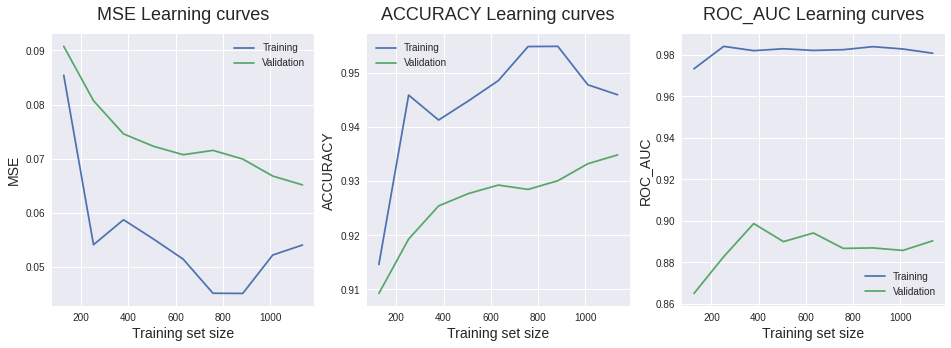

In [53]:
knn5_clf = KNeighborsClassifier(n_neighbors=5)
knn5_metric = train_with_cv(knn5_clf, X, y)
learning_curves_describe(knn5_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

El resultado AUC promediado es 0.8626
El resultado ACC promediado es 0.9248
El resultado CK promediado es 0.5804


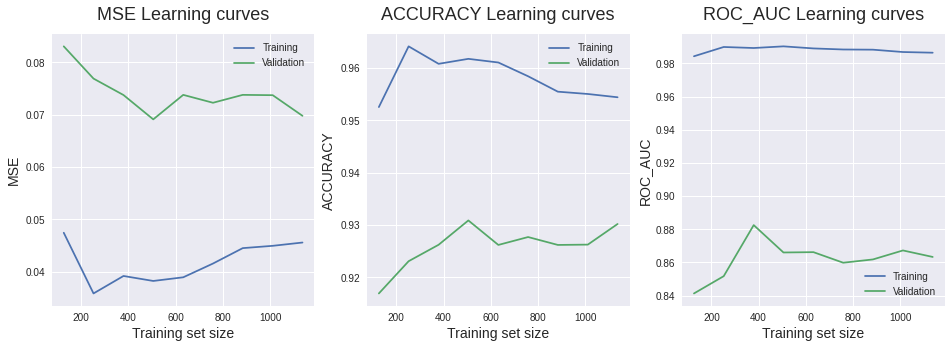

In [54]:
knn3_clf = KNeighborsClassifier(n_neighbors=3)
knn3_metric = train_with_cv(knn3_clf, X, y)
learning_curves_describe(knn3_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/abel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

El resultado AUC promediado es 0.9044
El resultado ACC promediado es 0.9233
El resultado CK promediado es 0.5377


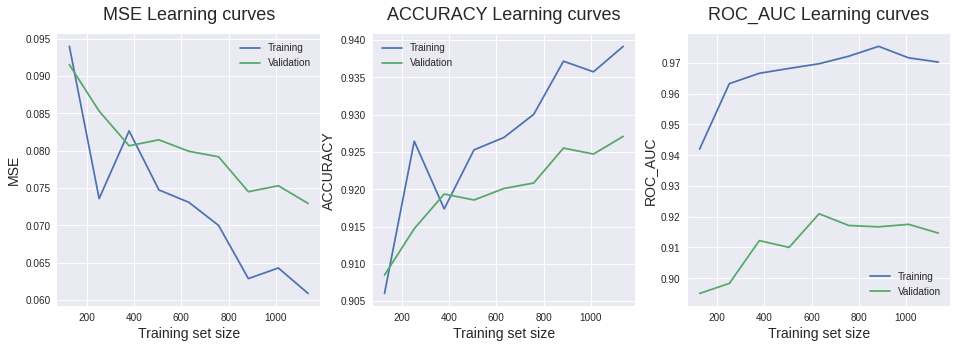

In [55]:
knn10_clf = KNeighborsClassifier(n_neighbors=10)
knn10_metric = train_with_cv(knn10_clf, X, y)
learning_curves_describe(knn10_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

El resultado AUC promediado es 0.9687
El resultado ACC promediado es 0.9433
El resultado CK promediado es 0.7111


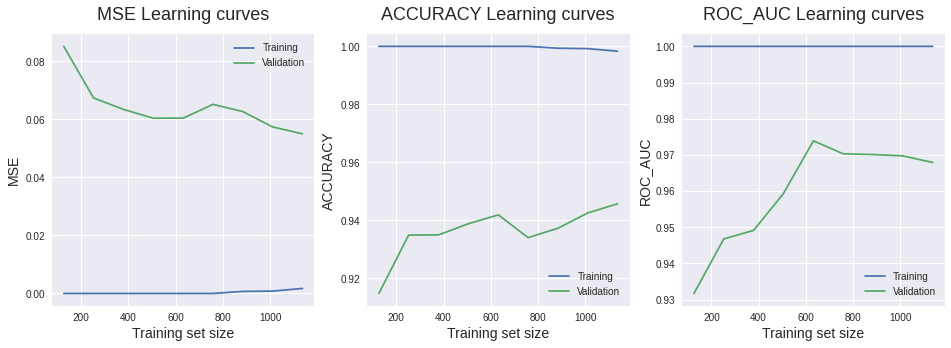

In [59]:
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gb_metric = train_with_cv(gb_clf, X, y)
learning_curves_describe(gb_clf,X,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9704
El resultado ACC promediado es 0.9418
El resultado CK promediado es 0.7048


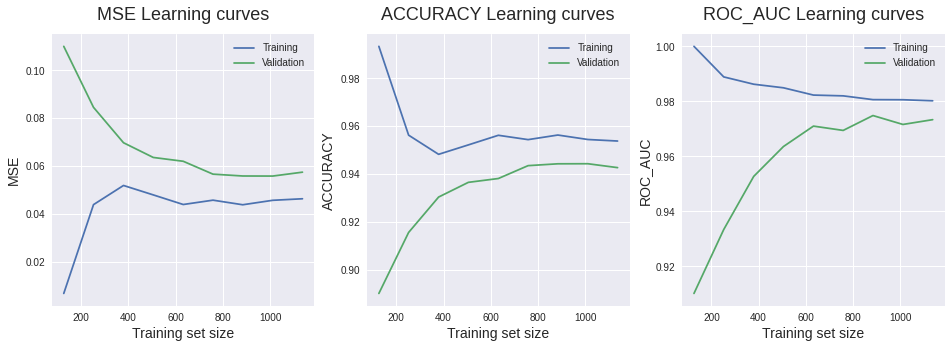

In [58]:
lr_clf = LogisticRegression(max_iter=10000, solver="liblinear")
lr_metric = train_with_cv(lr_clf, X, y)
learning_curves_describe(lr_clf,X,y)

In [69]:
label = ['dtg4','dte4', 'dte3','svm_r','svm_p', 'knn5', 'knn3', 'lr', 'gbc']
auc_s = [dtg4_metric[1], dte4_metric[1], dte3_metric[1], svmr_metric[1], svmp_metric[1], knn5_metric[1], knn3_metric[1], lr_metric[1], gb_metric[1]]
acc_s = [dtg4_metric[0], dte4_metric[0], dte3_metric[0], svmr_metric[0], svmp_metric[0], knn5_metric[0], knn3_metric[0], lr_metric[0], gb_metric[0]]
color = ['blue', 'violet', 'pink', 'green', 'black', 'yellow', 'orange', 'red', 'lime']

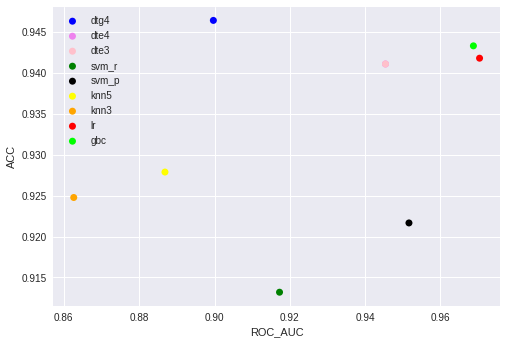

In [70]:
fig, ax = plt.subplots()
ax.set_xlabel("ROC_AUC")
ax.set_ylabel("ACC")
for i in range(9):
    ax.scatter(auc_s[i], acc_s[i], c=color[i],label=label[i],
               alpha=1, edgecolors='none')
ax.legend()
ax.grid(True)

plt.show()

Vamos a ver que nos dicen los modelos acerca de los features

In [59]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

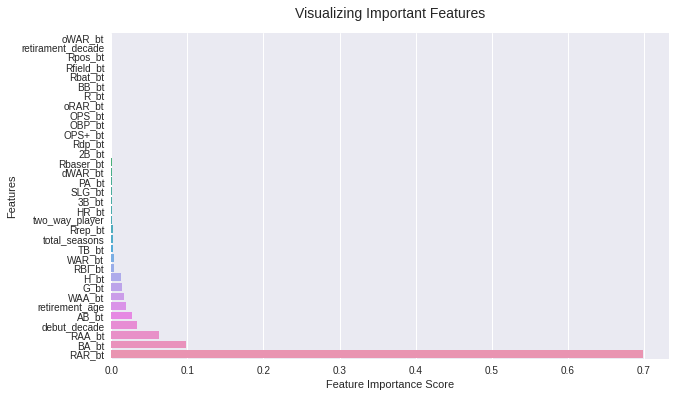

In [60]:
dt4_clf = DecisionTreeClassifier(max_depth=4)
plot_feature_importance(clasifier_ft_importance_experiments(dt4_clf,X,y).sort_values())

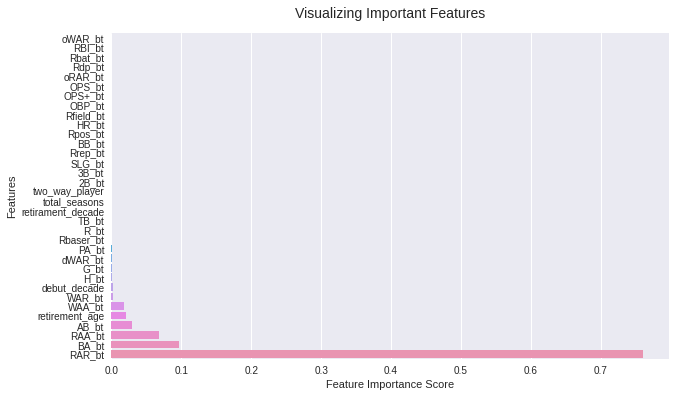

In [61]:
dt3_clf = DecisionTreeClassifier(max_depth=3)
plot_feature_importance(clasifier_ft_importance_experiments(dt3_clf,X,y).sort_values())

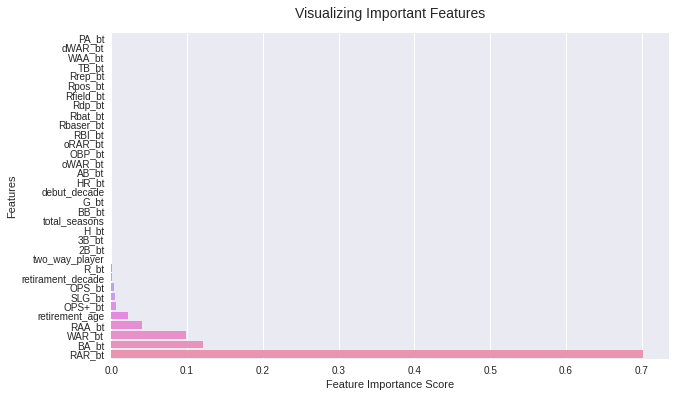

In [62]:
dt3e_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
plot_feature_importance(clasifier_ft_importance_experiments(dt3e_clf,X,y).sort_values())

Las estadísticas avanzadas parecieran ser las que llevan el mayor peso 

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

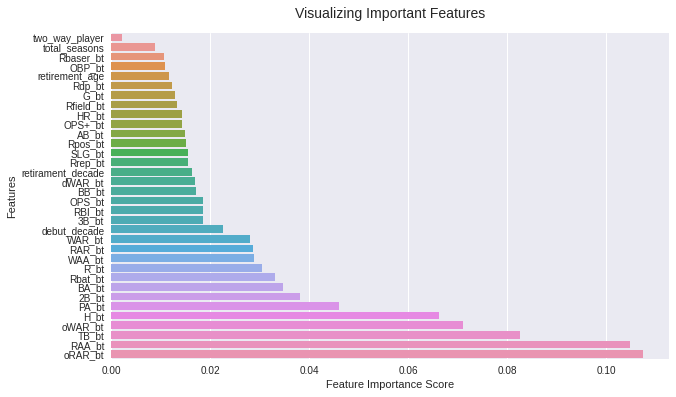

In [64]:
rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf10_clf,X,y).sort_values())

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

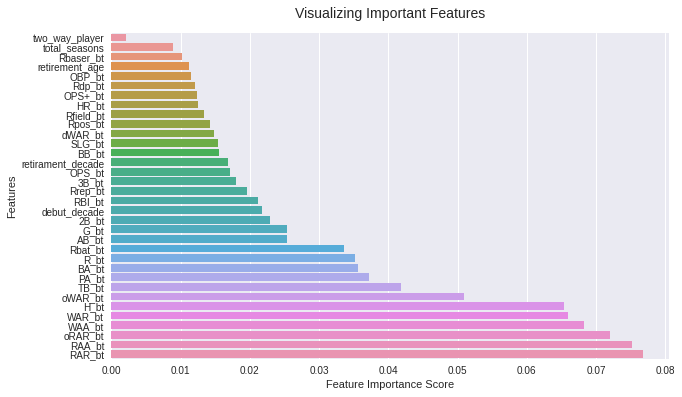

In [66]:
rf50_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y).sort_values())

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

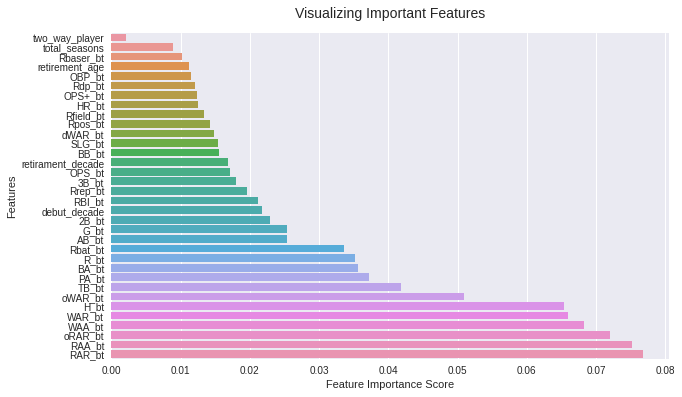

In [67]:
rf100_clf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y).sort_values())

/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

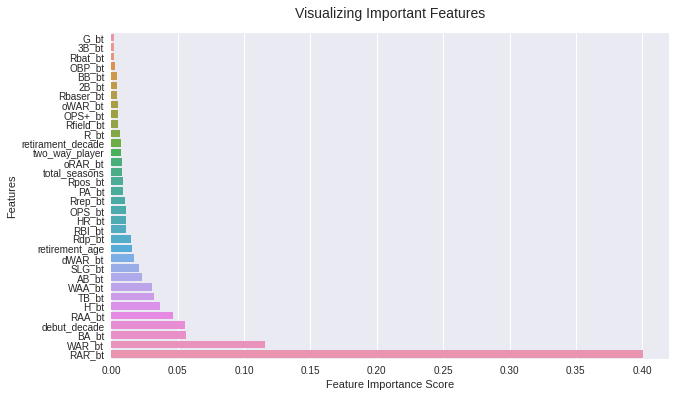

In [68]:
gb_clf = GradientBoostingClassifier(n_estimators=200)
plot_feature_importance(clasifier_ft_importance_experiments(gb_clf,X,y).sort_values())

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

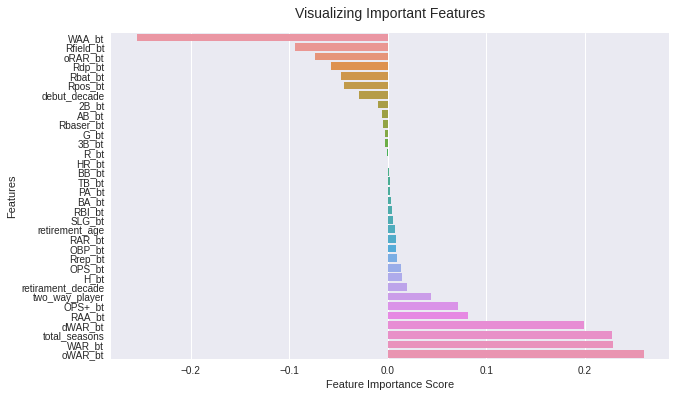

In [75]:
plot_feature_importance(clasifier_ft_importance_experiments(lr_clf,X,y,True).sort_values())

Vamos a probar con los algoritmos de seleccion de features y distintos algoritmos de clasificacion

In [79]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [81]:
feature_selection_RFE(DecisionTreeClassifier(max_depth=4),X, np.ravel(y), 10)

Feature: retirement_age, Rank: 1
Feature: debut_decade, Rank: 1
Feature: AB_bt, Rank: 1
Feature: BA_bt, Rank: 1
Feature: G_bt, Rank: 1
Feature: H_bt, Rank: 1
Feature: RAA_bt, Rank: 1
Feature: RAR_bt, Rank: 1
Feature: TB_bt, Rank: 1
Feature: WAA_bt, Rank: 1


In [82]:
feature_selection_RFE(RandomForestClassifier(),X, np.ravel(y), 10)

Feature: debut_decade, Rank: 1
Feature: BA_bt, Rank: 1
Feature: H_bt, Rank: 1
Feature: RAA_bt, Rank: 1
Feature: RAR_bt, Rank: 1
Feature: TB_bt, Rank: 1
Feature: WAA_bt, Rank: 1
Feature: WAR_bt, Rank: 1
Feature: oRAR_bt, Rank: 1
Feature: oWAR_bt, Rank: 1


El metodo de RFECV, selecciona automaticamente la cantidad de features

In [83]:
rfecv = RFECV(estimator=DecisionTreeClassifier())
rfecv.fit(X, np.ravel(y))
f = 0
for i in range(X.shape[1]):
    if rfecv.support_[i]:
        f+=1
        print(f'Feature: {X.columns[i]}, Rank: {rfecv.ranking_[i]}')
f

Feature: retirement_age, Rank: 1
Feature: debut_decade, Rank: 1
Feature: AB_bt, Rank: 1
Feature: BA_bt, Rank: 1
Feature: G_bt, Rank: 1
Feature: RAA_bt, Rank: 1
Feature: RAR_bt, Rank: 1
Feature: RBI_bt, Rank: 1
Feature: Rdp_bt, Rank: 1
Feature: Rrep_bt, Rank: 1


10

In [84]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

In [87]:
estimators = [DecisionTreeClassifier(max_depth=4)]
automatic_feature_selection(estimators, X, y, 35)

Total selections:35


[('BA_bt', 100.0, 1.0),
 ('RAR_bt', 100.0, 1.0),
 ('RAA_bt', 34.285714285714285, 1.0),
 ('AB_bt', 25.71428571428571, 1.0),
 ('debut_decade', 17.142857142857142, 1.0),
 ('H_bt', 17.142857142857142, 1.0),
 ('WAA_bt', 8.571428571428571, 1.0),
 ('retirement_age', 2.857142857142857, 1.0),
 ('retirament_decade', 2.857142857142857, 1.0),
 ('total_seasons', 2.857142857142857, 1.0),
 ('two_way_player', 2.857142857142857, 1.0),
 ('2B_bt', 2.857142857142857, 1.0),
 ('3B_bt', 2.857142857142857, 1.0),
 ('BB_bt', 2.857142857142857, 1.0),
 ('G_bt', 2.857142857142857, 1.0),
 ('HR_bt', 2.857142857142857, 1.0),
 ('OBP_bt', 2.857142857142857, 1.0),
 ('OPS+_bt', 2.857142857142857, 1.0),
 ('OPS_bt', 2.857142857142857, 1.0),
 ('RBI_bt', 2.857142857142857, 1.0),
 ('R_bt', 2.857142857142857, 1.0),
 ('Rbaser_bt', 2.857142857142857, 1.0),
 ('Rbat_bt', 2.857142857142857, 1.0),
 ('Rdp_bt', 2.857142857142857, 1.0),
 ('Rfield_bt', 2.857142857142857, 1.0),
 ('Rpos_bt', 2.857142857142857, 1.0),
 ('Rrep_bt', 2.8571428

In [88]:
estimators = [LogisticRegression(max_iter=10000, solver="liblinear")]
automatic_feature_selection(estimators, X, y, 35)

Total selections:35


[('debut_decade', 100.0, 1.0),
 ('retirament_decade', 100.0, 1.0),
 ('total_seasons', 100.0, 1.0),
 ('two_way_player', 100.0, 1.0),
 ('2B_bt', 100.0, 1.0),
 ('AB_bt', 100.0, 1.0),
 ('H_bt', 100.0, 1.0),
 ('OBP_bt', 100.0, 1.0),
 ('OPS+_bt', 100.0, 1.0),
 ('OPS_bt', 100.0, 1.0),
 ('PA_bt', 100.0, 1.0),
 ('RAA_bt', 100.0, 1.0),
 ('RAR_bt', 100.0, 1.0),
 ('RBI_bt', 100.0, 1.0),
 ('Rbat_bt', 100.0, 1.0),
 ('Rdp_bt', 100.0, 1.0),
 ('Rfield_bt', 100.0, 1.0),
 ('Rpos_bt', 100.0, 1.0),
 ('SLG_bt', 100.0, 1.0),
 ('TB_bt', 100.0, 1.0),
 ('WAA_bt', 100.0, 1.0),
 ('WAR_bt', 100.0, 1.0),
 ('dWAR_bt', 100.0, 1.0),
 ('oRAR_bt', 100.0, 1.0),
 ('oWAR_bt', 100.0, 1.0)]

In [89]:
estimators = [DecisionTreeClassifier(max_depth=4), LogisticRegression(max_iter=10000, solver="liblinear")]
automatic_feature_selection(estimators, X, y, 35)

Total selections:70


[('RAR_bt', 100.0, 1.0),
 ('RAA_bt', 67.14285714285714, 1.0),
 ('AB_bt', 65.71428571428571, 1.0),
 ('H_bt', 55.714285714285715, 1.0),
 ('debut_decade', 55.714285714285715, 1.0),
 ('WAA_bt', 51.42857142857142, 1.0),
 ('BA_bt', 50.0, 1.0),
 ('retirament_decade', 50.0, 1.0),
 ('total_seasons', 50.0, 1.0),
 ('two_way_player', 50.0, 1.0),
 ('2B_bt', 50.0, 1.0),
 ('OBP_bt', 50.0, 1.0),
 ('OPS+_bt', 50.0, 1.0),
 ('OPS_bt', 50.0, 1.0),
 ('PA_bt', 50.0, 1.0),
 ('RBI_bt', 50.0, 1.0),
 ('Rbat_bt', 50.0, 1.0),
 ('Rdp_bt', 50.0, 1.0),
 ('Rfield_bt', 50.0, 1.0),
 ('Rpos_bt', 50.0, 1.0),
 ('SLG_bt', 50.0, 1.0),
 ('TB_bt', 50.0, 1.0),
 ('WAR_bt', 50.0, 1.0),
 ('dWAR_bt', 50.0, 1.0),
 ('oRAR_bt', 50.0, 1.0),
 ('oWAR_bt', 50.0, 1.0)]

Veamos la correlacion de las variables respecto al Target

In [49]:
df = select_features(inactive_mayors_lg_bat_df, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF                  1.000000
RAR_bt               0.671258
WAR_bt               0.667656
oRAR_bt              0.648934
oWAR_bt              0.647620
RAA_bt               0.646639
WAA_bt               0.639788
R_bt                 0.582750
H_bt                 0.573263
TB_bt                0.567642
RBI_bt               0.555222
Rbat_bt              0.540375
2B_bt                0.532070
PA_bt                0.517306
AB_bt                0.509586
Rrep_bt              0.499681
G_bt                 0.475106
3B_bt                0.458177
BB_bt                0.441492
total_seasons        0.437270
BA_bt                0.414930
OPS_bt               0.399514
OPS+_bt              0.390723
OBP_bt               0.369565
SLG_bt               0.352061
retirement_age       0.351949
HR_bt                0.320585
Rbaser_bt            0.219022
Rfield_bt            0.207313
debut_decade         0.125439
two_way_player       0.103981
dWAR_bt              0.085501
retirament_decade    0.078117
Rpos_bt   

Pongamos 50% como limite

In [53]:
feat_more_corr = df_corr[df_corr > 0.5].index.to_list()[1:]
feat_more_corr

['RAR_bt',
 'WAR_bt',
 'oRAR_bt',
 'oWAR_bt',
 'RAA_bt',
 'WAA_bt',
 'R_bt',
 'H_bt',
 'TB_bt',
 'RBI_bt',
 'Rbat_bt',
 '2B_bt',
 'PA_bt',
 'AB_bt']

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=4)

[Text(0.4791666666666667, 0.9, 'RAR_bt <= 483.0\ngini = 0.188\nsamples = 1068\nvalue = [956, 112]\nclass = NoHoF'),
 Text(0.2708333333333333, 0.7, 'H_bt <= 2375.5\ngini = 0.048\nsamples = 926\nvalue = [903, 23]\nclass = NoHoF'),
 Text(0.16666666666666666, 0.5, 'OPS_bt <= 0.937\ngini = 0.035\nsamples = 907\nvalue = [891, 16]\nclass = NoHoF'),
 Text(0.08333333333333333, 0.3, 'two_way_player <= 0.5\ngini = 0.03\nsamples = 904\nvalue = [890, 14]\nclass = NoHoF'),
 Text(0.041666666666666664, 0.1, 'gini = 0.028\nsamples = 903\nvalue = [890, 13]\nclass = NoHoF'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = HoF'),
 Text(0.25, 0.3, 'Rbaser_bt <= -4.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = HoF'),
 Text(0.20833333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NoHoF'),
 Text(0.2916666666666667, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = HoF'),
 Text(0.375, 0.5, 'AB_bt <= 7797.0\ngini = 0.465\nsamples = 19\nvalue = [12, 7]\nclass =

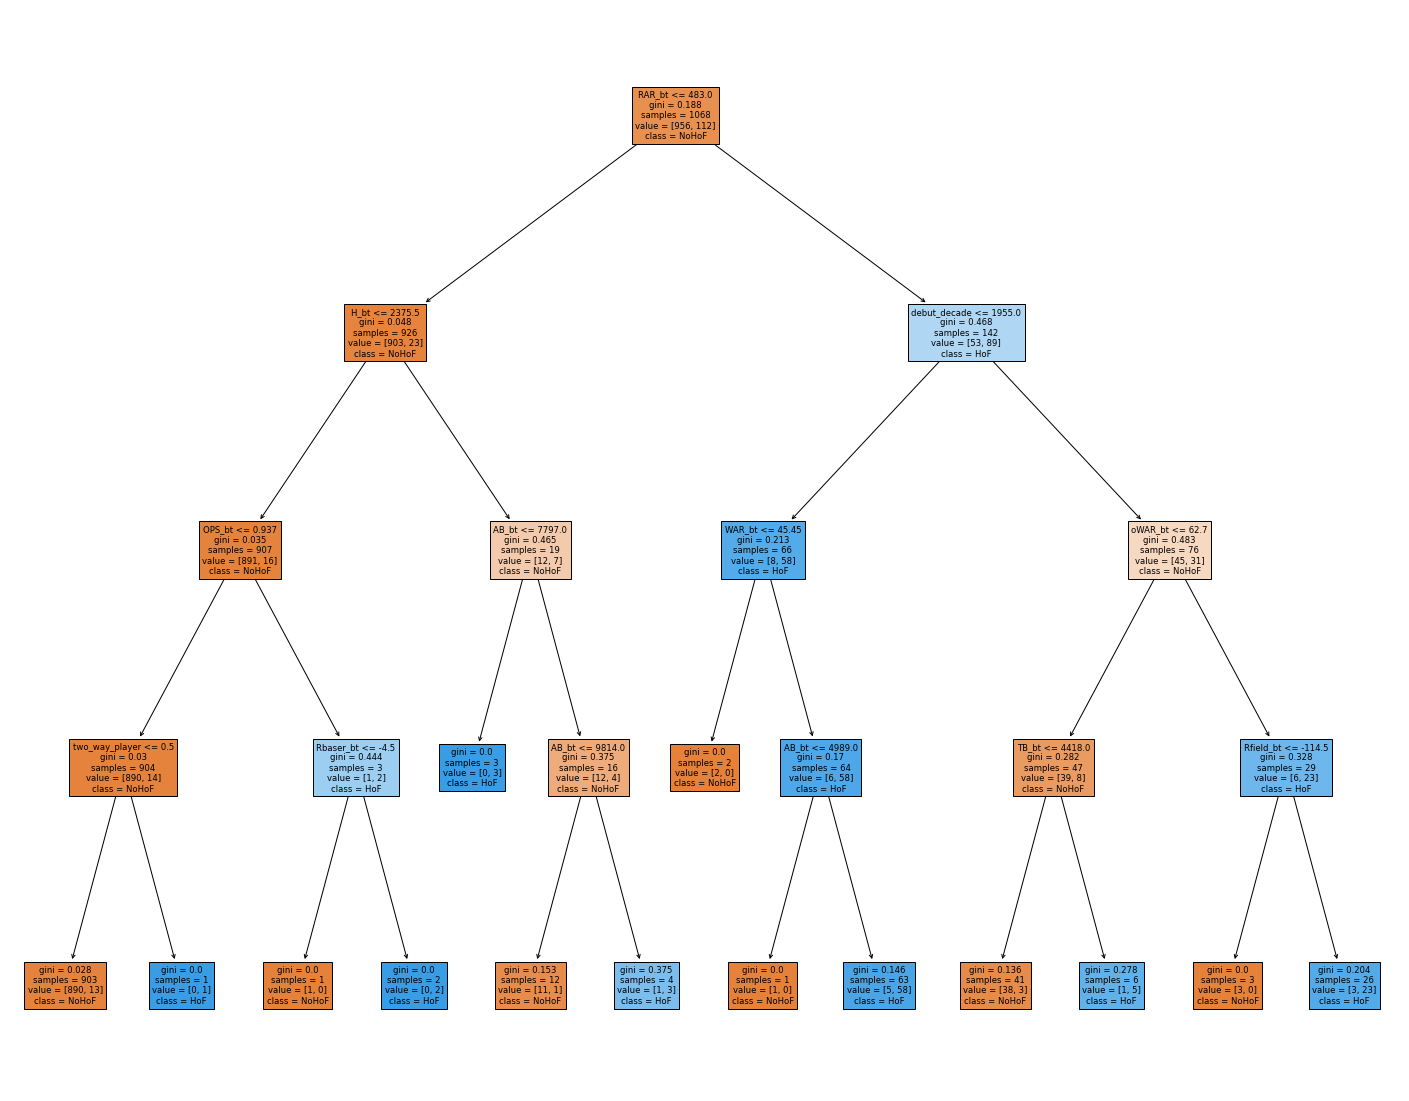

In [106]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt_clf, feature_names=X.columns, class_names=['NoHoF','HoF'], filled=True)

In [32]:
X_t = X.to_numpy()

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2,
                n_init=8,
                tol=1e-4, 
                random_state=170).fit(X_t)

In [35]:
import numpy as np
groups = np.zeros((2,2))

In [36]:
import matplotlib.pyplot as plt

In [37]:
labels = kmeans.labels_
hall_ = y.to_numpy()

In [38]:
print(len(labels))
print(len(hall_))

5355
5355


In [39]:
for i in range(len(labels)):
    groups[labels[i], hall_[i]] +=1

In [40]:
groups

array([[3999.,    9.],
       [1181.,  166.]])